# 🚗 **Welcome to the <font color='crimson'>** **Explorer Transportation Data Science Project! 🚗**</font>
 Hosted by the [Northeast Big Data Innovation Hub](https://nebigdatahub.org/about) & [National Student Data Corps](https://nebigdatahub.org/nsdc), in collaboration with the [U.S. Department of Transportation Federal Highway Administration](https://highways.dot.gov/).


---



## <font color='crimson'>**Project Information and Background:**</font>

**Project Description:**

By participating in this project, you are joining a
community of transportation data science learners interested in making roads safer for vulnerable road users.

The Explorer TDSP has six Milestones, including guided transportation research into a community of interest. Each Milestone can take 1-5 hours, or less, depending on your level of experience.

To learn more about this project, including key highlights, incentives, and important links, [review the TDSP Webpage here](https://nebigdatahub.org/nsdc/tdsp/)!


---
---

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic exploratory data analysis.
  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Step 1:** Let’s access our data. We will be using the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC." If you need a reminder on how to upload your dataset, [please review helpful hints here.](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf)


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20241212.csv")

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [8]:
desc_stats = data.describe()
desc_stats

The information above is currently formatted in scientific notation. Need a refresher? [Review how to analyze and convert to and from scientific notation here!](https://www.mathsisfun.com/numbers/scientific-notation.html)

1. Latitude & Longitude: The latitude and longitude indicate where the crashes are occurring. However, there are some data points with latitude and longitude values of 0, which is likely due to missing or inaccurate data.

2. Number of Persons Injured: On average, each crash has around 0.305 injuries. The maximum number of injuries in a single crash is 43.

3. Number of Persons Killed: Fatalities are rare, with an average of 0.00146 deaths per crash. The maximum number of deaths in one crash is 8.

4. Number of Pedestrians, Cyclists, and Motorists Injured/Killed: These columns provide a breakdown of the injuries and fatalities by type of individual involved.

5. Collision ID: This is a unique identifier for each crash.



---



##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>
GOAL: The main goal of this milestone is to assess the dataset, find missing values, and decide what to do with those missing data points.

**Step 2:**
Check the dataset for missing values.


In [ ]:
missing_values = data.isnull().sum()

missing_values_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({'Missing Values':missing_values, 'Percentage (%)':missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2131752,99.567122
CONTRIBUTING FACTOR VEHICLE 5,2131457,99.553344
VEHICLE TYPE CODE 4,2107237,98.422107
CONTRIBUTING FACTOR VEHICLE 4,2105984,98.363584
VEHICLE TYPE CODE 3,1992736,93.074142
CONTRIBUTING FACTOR VEHICLE 3,1986943,92.803570
OFF STREET NAME,1774077,82.861300
CROSS STREET NAME,816251,38.124399
ZIP CODE,664692,31.045576
BOROUGH,664430,31.033339


<ipython-input-35-99f595c472cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


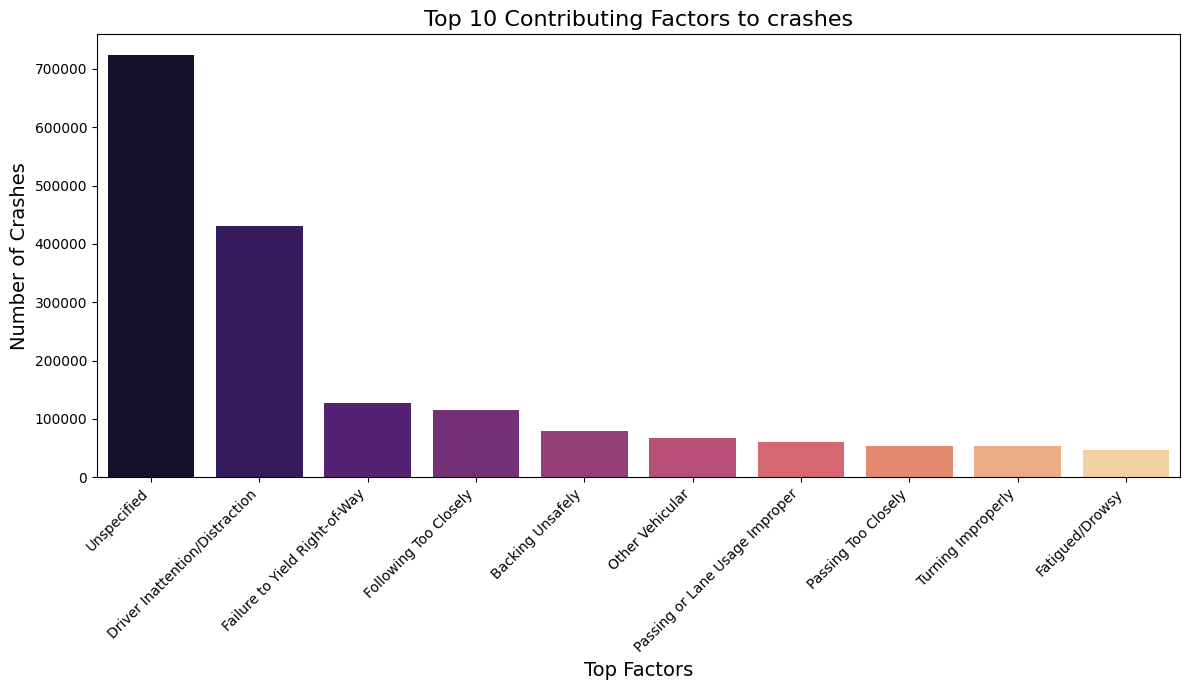

In [ ]:

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('Top Factors', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Besides for "Unspecified," what are the top 3 contributing factors that cause the most crashes?**

> *  Driver Inattention/distraction
> *  Failure to Yield Right-of-way
> *  Following too closely

**What recommendations would you make to new and current drivers after assessing the above data?**

> * Avoid using mobile phones or engaging in other activities (e.g., eating, adjusting the radio) while driving and utilize hands-free devices if communication is essential, but prioritize pulling over to a safe spot if extended attention is required. Increase awareness campaigns or include scenarios in driving tests to ensure mastery of these rules and educate drivers about situations where yielding is mandatory, such as at intersections, pedestrian crossings, and merging lanes. Lastly, highlight the risks of tailgating and its association with rear-end collisions in driver education programs.






<ipython-input-34-d81efa66963e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


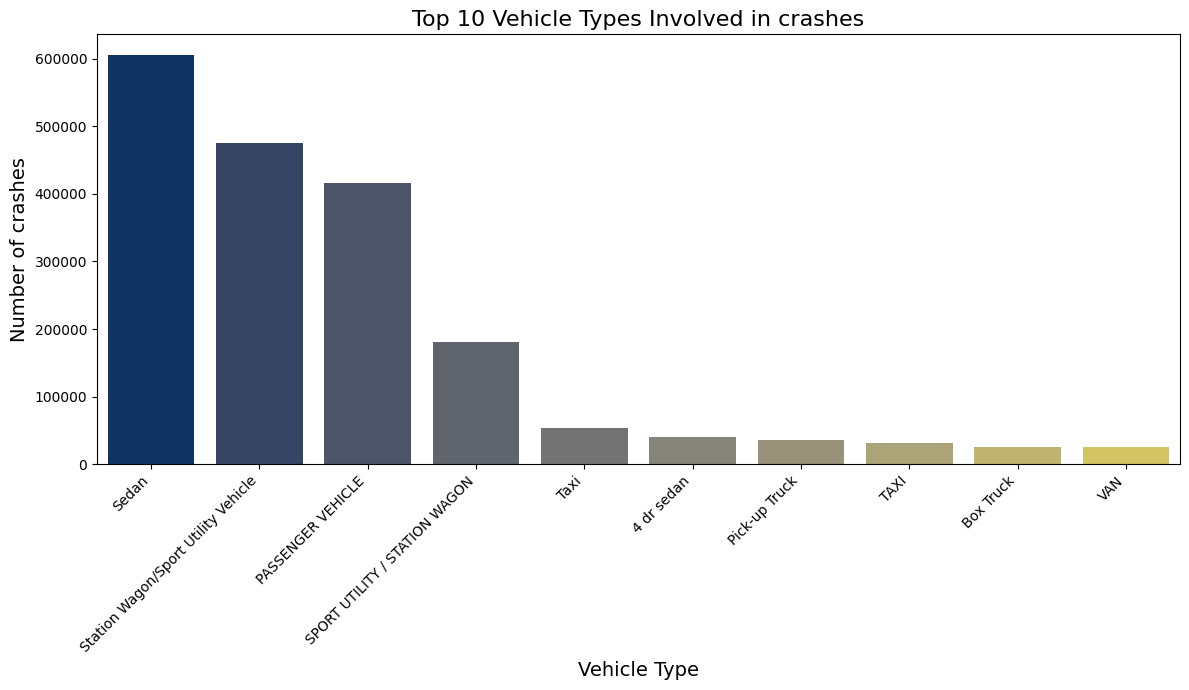

In [ ]:
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**What are the top 3 vehicles that were most involved in crashes?**


> *   Sedan
> *   Station Wagon/Sport Utility Vehicle
> *   Passenger Vehicle







**Why do you think that "Sedan[s]," "Station Wagon[s]," and "Passenger Vehicle[s]" are involved in a larger number of crashes, injuries, and deaths when compared to the rest of the vehicles?**


> *  These vehicle types make up a significant proportion of vehicles in use, particularly in urban and suburban areas where traffic density is high. Their sheer numbers increase their likelihood of being involved in accidents. Passenger vehicles are popular among a wide range of drivers, including younger or less experienced drivers, who statistically have higher accident rates. Furthermore, larger vehicles like trucks often operate under stricter regulations and professional drivers, potentially reducing their crash involvement rate.






1) What do you notice? </br>
> *  There is inconsistency in naming conventions, such as variations in capitalization (e.g., "PASSENGER VEHICLE" vs. "Passenger Vehicle") and formatting (e.g., "SPORT UTILITY / STATION WAGON"). Also some vehicle types are repeated, potentially splitting data into multiple categories (e.g., "Taxi" and "TAXI").
2) What would you recommend we do to improve the bar chart, based on the x-axis (horizontal axis) and why? </br>
> *  Combine duplicate or similar vehicle types (e.g., "Taxi" and "TAXI") to avoid splitting data across redundant categories.
3) What recommendation would you make to those who are collecting and/or inputting data into this dataset?</br>
> *  Use consistent and standardized names for vehicle types across the dataset to avoid duplications (e.g., use "Passenger Vehicle" consistently instead of variations). Implement automated checks to identify and correct inconsistencies during data entry







<ipython-input-42-22663233cbe3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


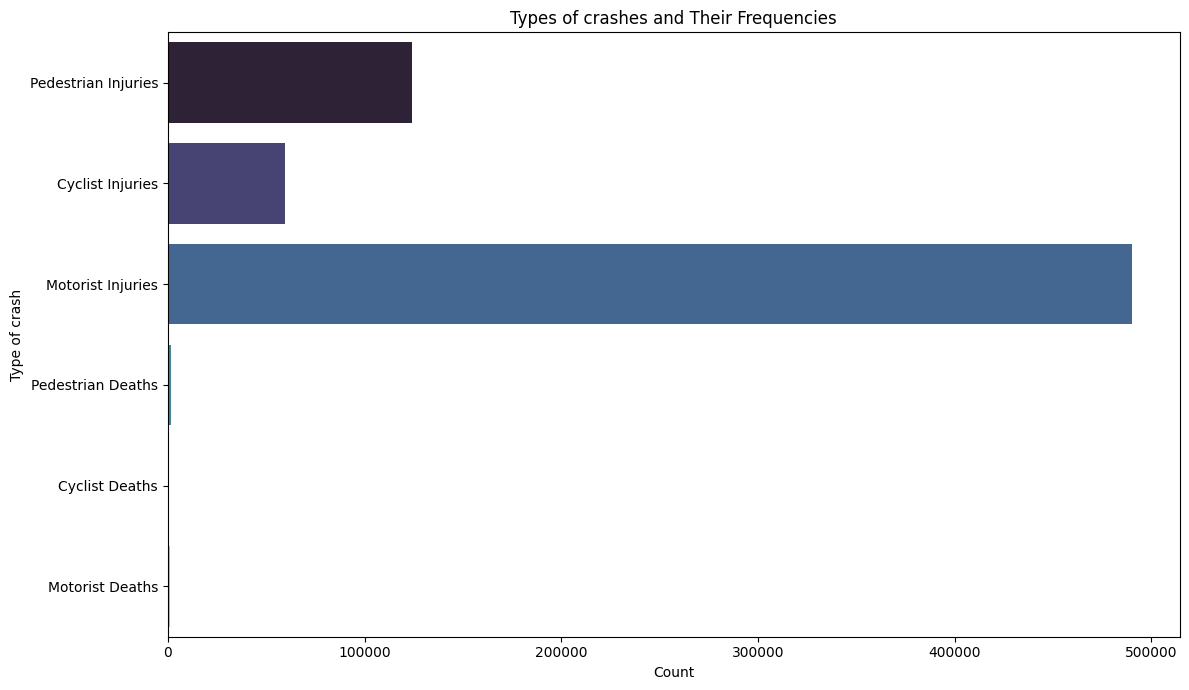

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data["NUMBER OF MOTORIST INJURED"].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


**What is a recommendation you might make to the Department of Transportation based on this data?**


> *  Prioritize campaigns and initiatives to reduce motorist injuries, such as stricter enforcement of speed limits, distracted driving laws, and increased visibility of warning systems at intersections.Invest in dedicated infrastructure like pedestrian overpasses, protected bike lanes, and better street lighting to enhance safety. Conduct public awareness campaigns for both motorists and non-motorists on sharing the road responsibly. Lastly, regularly update crash analysis data to evaluate the effectiveness of interventions.





---

##<font color='crimson'> **Milestone #3 - Time Series Analysis**</font>
GOAL: The main goal of this milestone is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

In [ ]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')
data['Hour of Day'] = data['CRASH TIME'].dt.hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()
average_crashes_per_hour

,0
Hour of Day,
0,2906.458333
1,1567.916667
2,1202.291667
3,1059.375000
4,1203.708333
5,1302.750000
6,2004.208333
7,2736.041667
8,4894.375000


<ipython-input-5-5422adfee26d>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


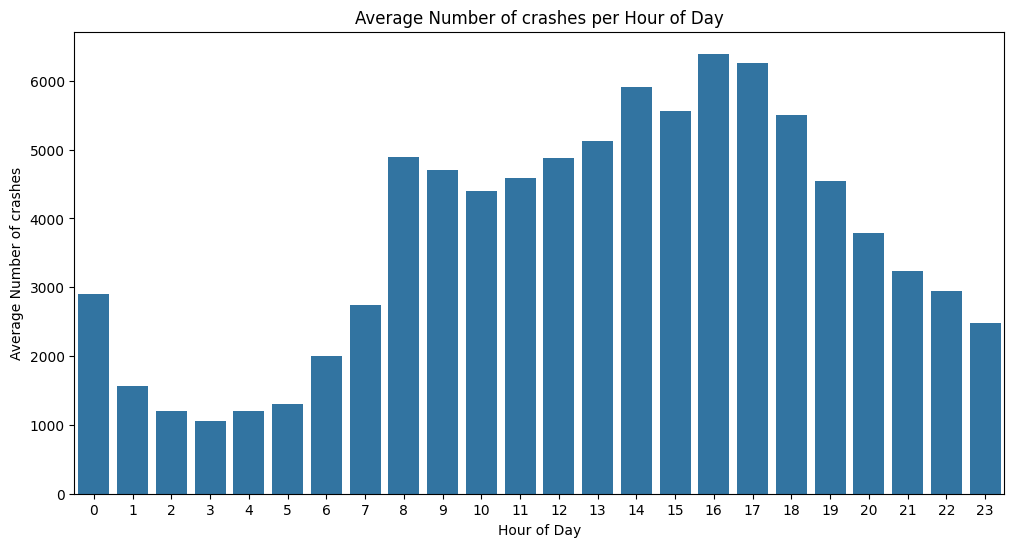

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20241212.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()
average_crashes_per_hour.index.name = 'Hour of Day'
average_crashes_per_hour = average_crashes_per_hour.reset_index()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour['Hour of Day'], y=average_crashes_per_hour[0])
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
#plt.xticks(range(0, 24))
plt.show()



**Which time of the day sees the most crashes? Why do you think so?**

> *  The time of day with the most crashes is 4 PM, closely followed by 3 PM and 5 PM, likely due to the evening rush hour when many people are commuting home from work or school, leading to increased traffic congestion. During this time, driver fatigue or distraction after a long workday, combined with a higher volume of vehicles, raises the likelihood of accidents.



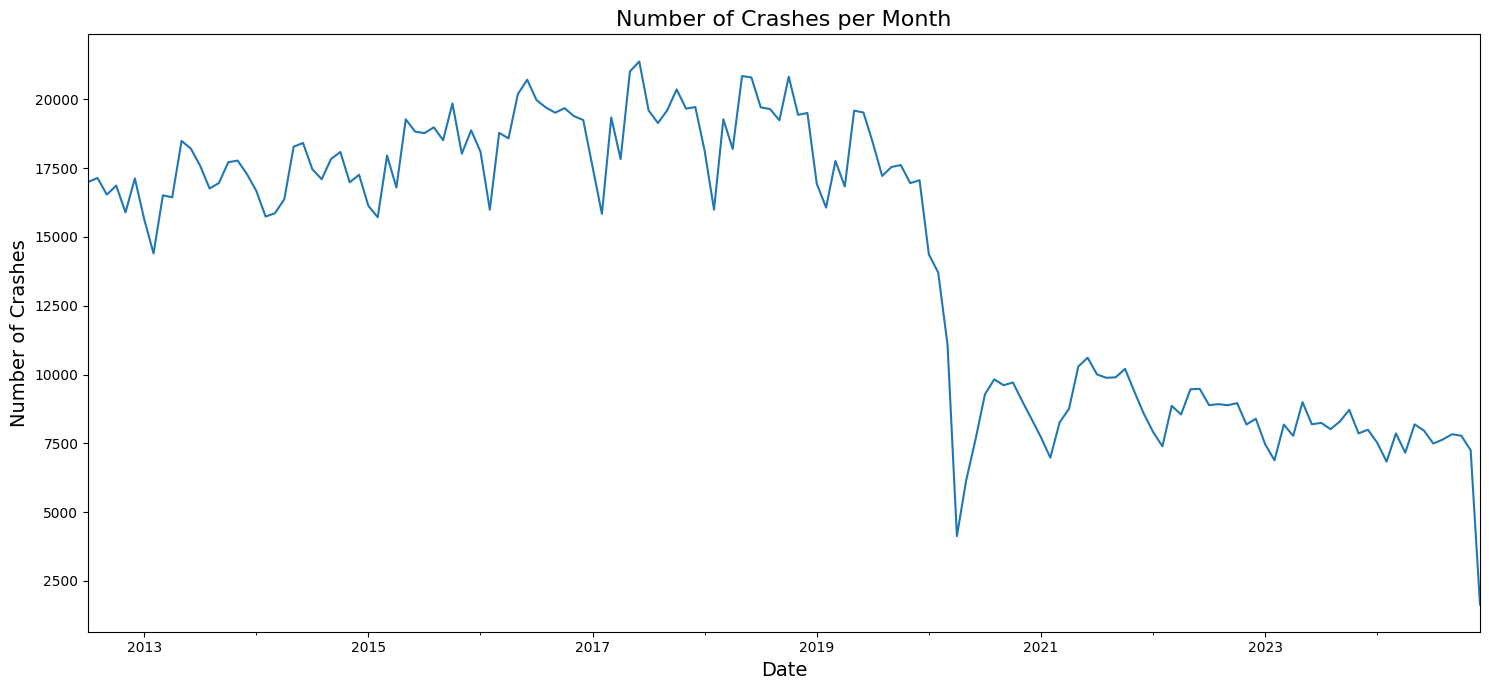

In [ ]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

**What does your graph tell you about the impact of COVID-19 on the number of crashes per month? Why do you think this occurred?**

> *  The graph shows a significant drop in the number of crashes per month during early 2020, coinciding with the onset of the COVID-19 pandemic. This decline was driven by lockdown measures, social distancing policies, and reduced mobility, which drastically decreased road traffic. Post-COVID, the number of crashes remained lower than pre-pandemic levels due to several factors. Many companies adopted remote or hybrid work models, permanently reducing commuter traffic, while online shopping and lifestyle changes led to fewer discretionary trips.  Additionally, economic factors like high fuel prices and delayed recovery in sectors like tourism and in-person events further contributed to sustained lower traffic volumes. These combined changes highlight how COVID-19 caused a lasting shift in travel and driving patterns.



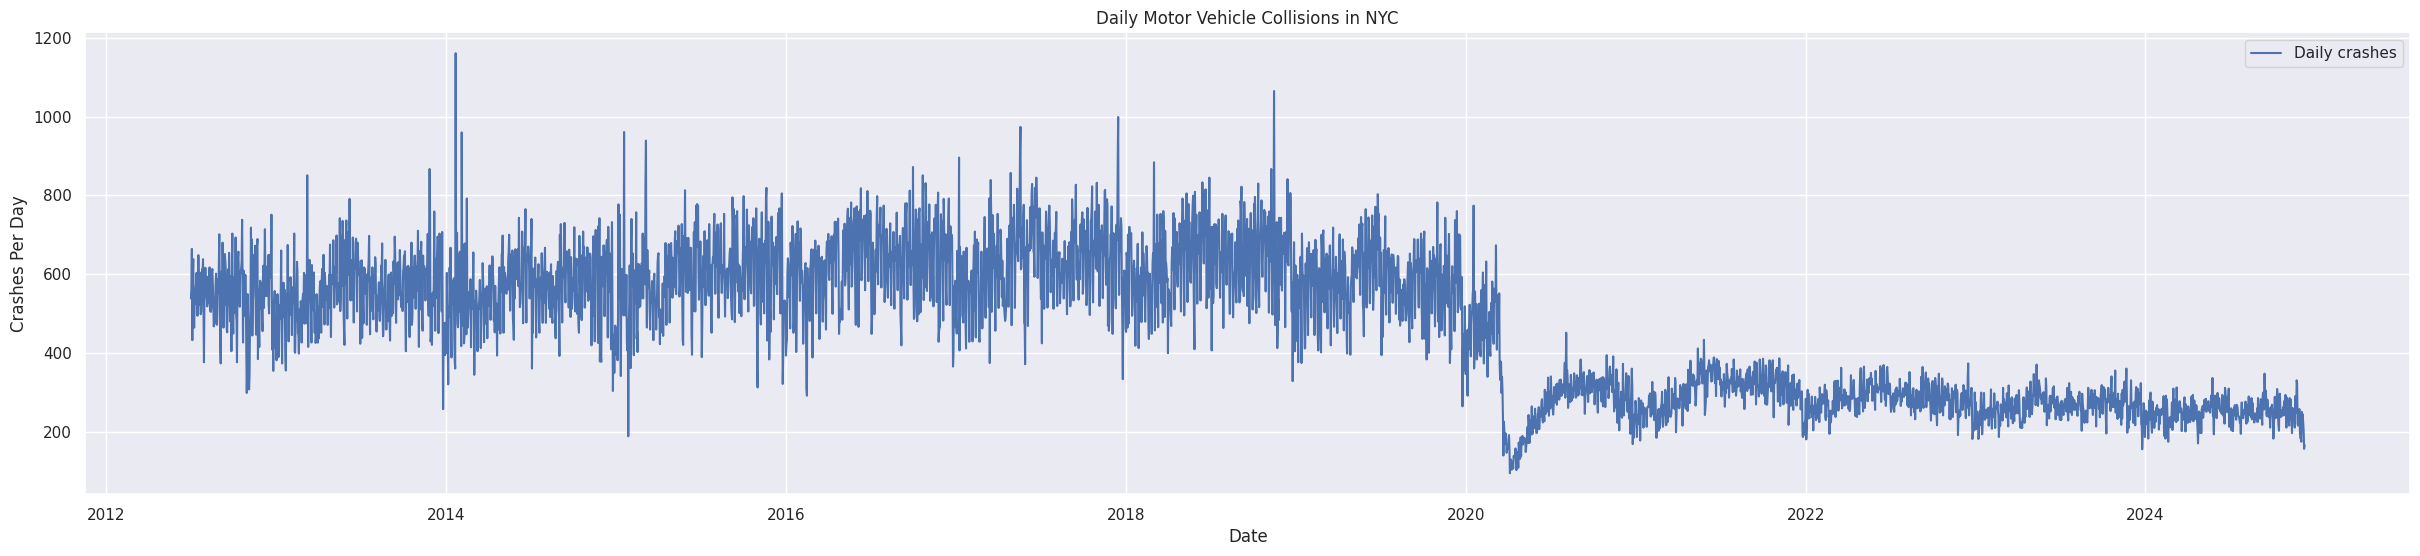

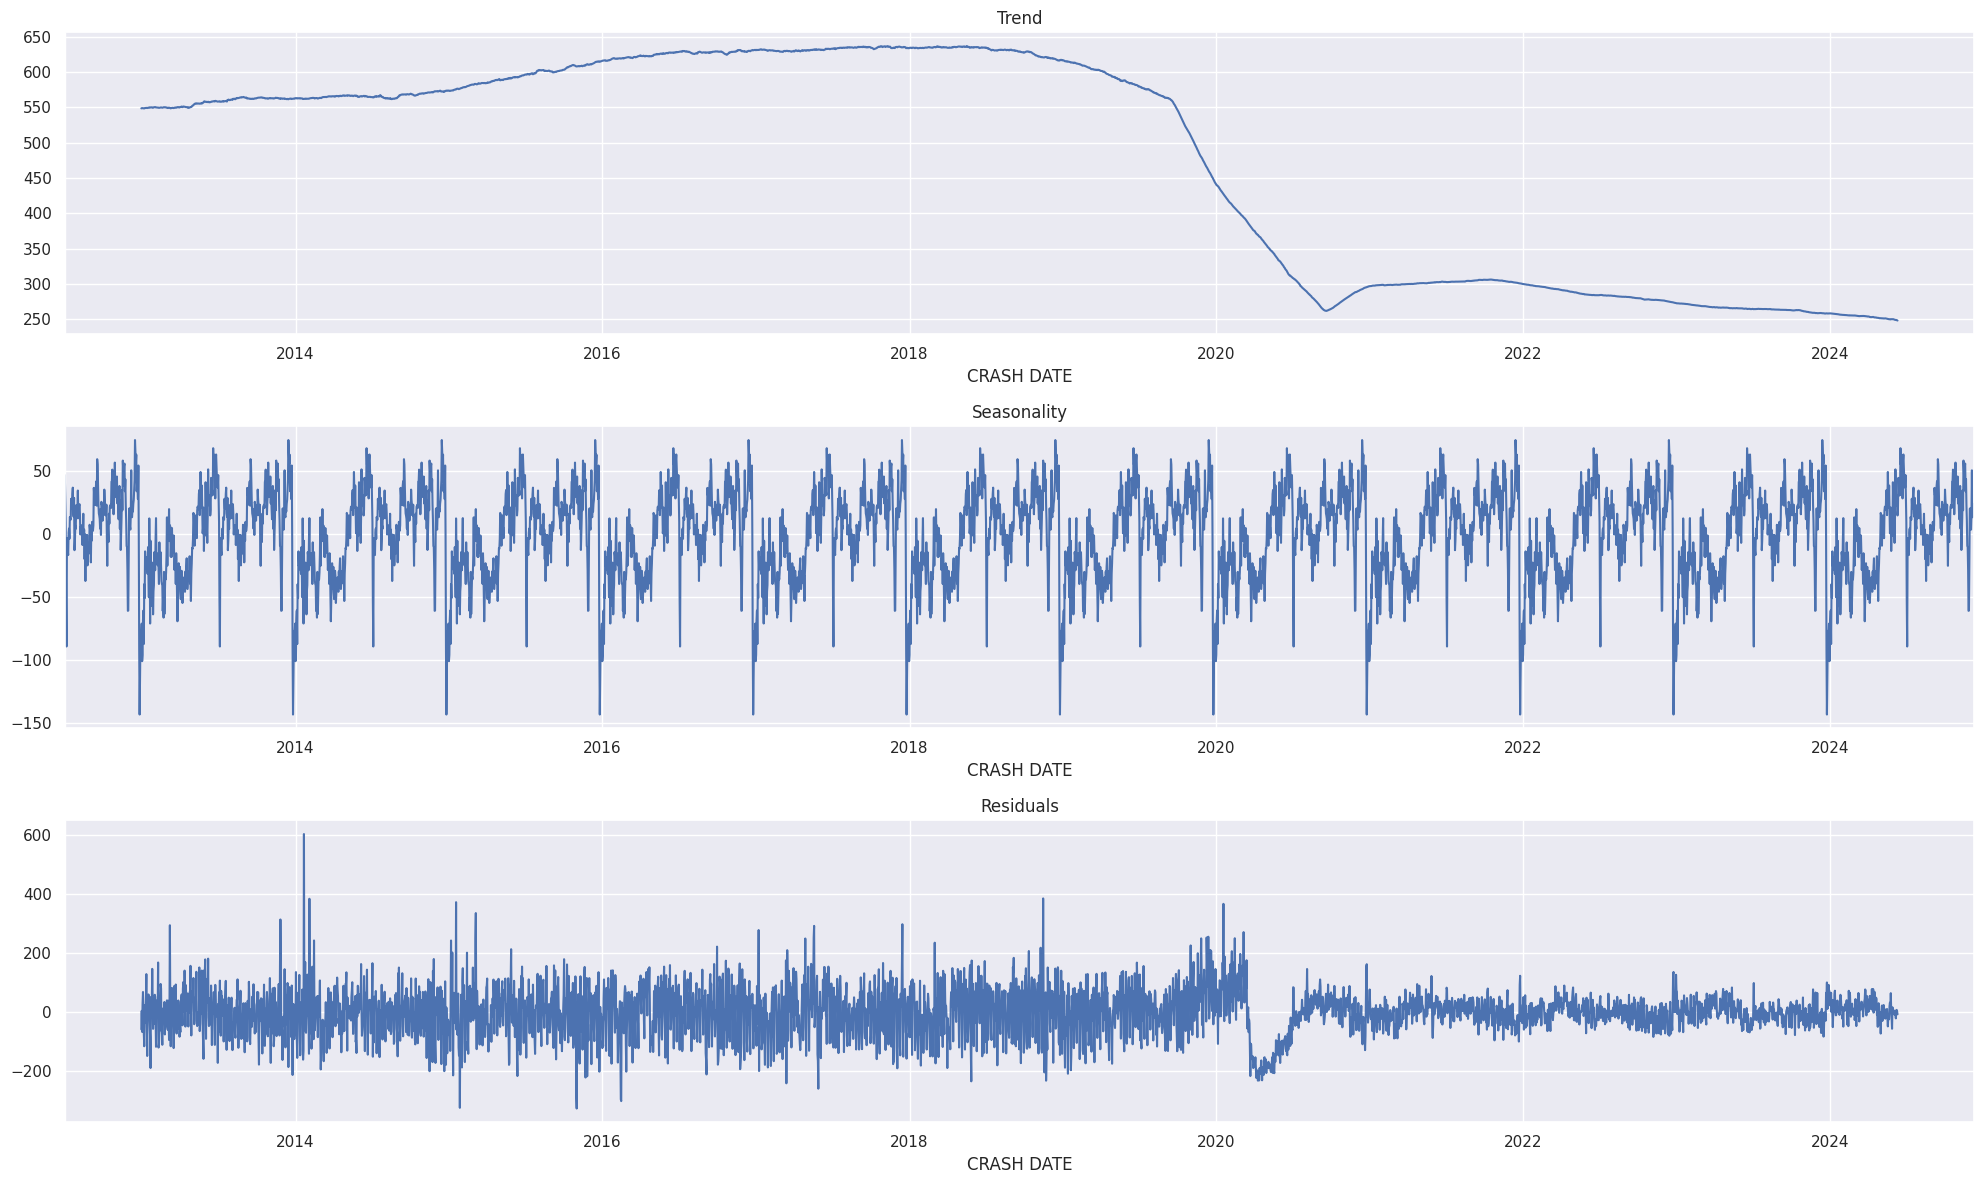

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Group by date to aggregate crashes per day
daily_crashes = data.groupby(data['CRASH DATE'].dt.to_period("D")).size()
daily_crashes.index = daily_crashes.index.to_timestamp()  # Convert PeriodIndex to Timestamp
daily_crashes.name = 'Crashes'  # Name the series

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(30, 6))
plt.plot(daily_crashes.index, daily_crashes.values, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Crashes Per Day')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()


**Based on your *trend graph*, are we seeing an increase or a decrease in crashes between 2014 and 2022?**

> *  Based on the trend graph, we observe a general increase in crashes from 2014 to around 2018. However, starting in 2018, the trend flattens and then shows a sharp decline beginning in early 2020, corresponding to the onset of the COVID-19 pandemic. From 2020 to 2022, the number of crashes remains significantly lower compared to pre-2020 levels, indicating a sustained decrease in crashes during and after the pandemic period.


**Based on your *residual graph*, in what year(s) was there a significant unpredicted fluctuation? Why do you think so?**

> *  The residuals appear to exhibit a relatively stable pattern for the majority of the period, fluctuating around zero.However, there seems to be a notable spike in the residuals around the year 2020 due to COVID-19 Pandemic. This suggests a significant departure from the expected trend during that year.

---

##<font color='crimson'>**Milestone #4 - Geospatial Analysis**</font>
GOAL: The main goal of this milestone is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

In [ ]:
borough_count = data['BOROUGH'].value_counts(dropna=True)
borough_count.values

array([471087, 396111, 328968, 218521,  61903])

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
borough_count = data['BOROUGH'].value_counts(dropna=True)
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Which borough has the highest number of crashes? Which borough has the lowest?**

> * Highest:Brooklyn
> * Lowest:Staten Island


**Are there any reasons that you think a certain borough has a higher or lower number of crashes? What are some factors that may be causing this?**

> *  Brooklyn has the highest number of crashes, which can be attributed to several factors. Brooklyn is the most populous borough in New York City, leading to higher vehicular traffic and pedestrian activity, which increases the likelihood of accidents.
Brooklyn has the highest number of crashes, which can be attributed to several factors. Brooklyn is the most populous borough in New York City, leading to higher vehicular traffic and pedestrian activity, which increases the likelihood of accidents. The borough also has a mix of residential, commercial, and industrial zones, which can create congested road conditions. Additionally, its complex network of streets, intersections, and ongoing urban development projects may contribute to challenging driving environments.

> * On the other hand, Staten Island has the lowest number of crashes, likely due to its smaller population and lower density of urban areas. Staten Island has more suburban characteristics, wider roads, and less frequent pedestrian activity, which can reduce the chances of collisions.

In [13]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


**When looking at your heatmap, where do you see a concentration of crashes?**


> *  Newyork City Midtown




In [ ]:
# Continue building your heatmap
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "blue"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")


**Which intersection(s) seem to be the most dangerous?**

> *  3rd Avenue and Saint Pauls Place, Beach Avenue and Mansion Street, West 30th Street, and 65th Street



---
---

##<font color='crimson'>  **Milestone #5 - Self-Guided Research Question**</font>
GOAL: In this Milestone, you will be prompted to take what you’ve learned throughout this project, build your own research question, and create a visualization(s) or model(s) to support your research goals.


**Research Questions**

> * What are the top contributing factors to vehicle crashes across different boroughs, and how do these factors vary geographically after excluding unspecified causes?

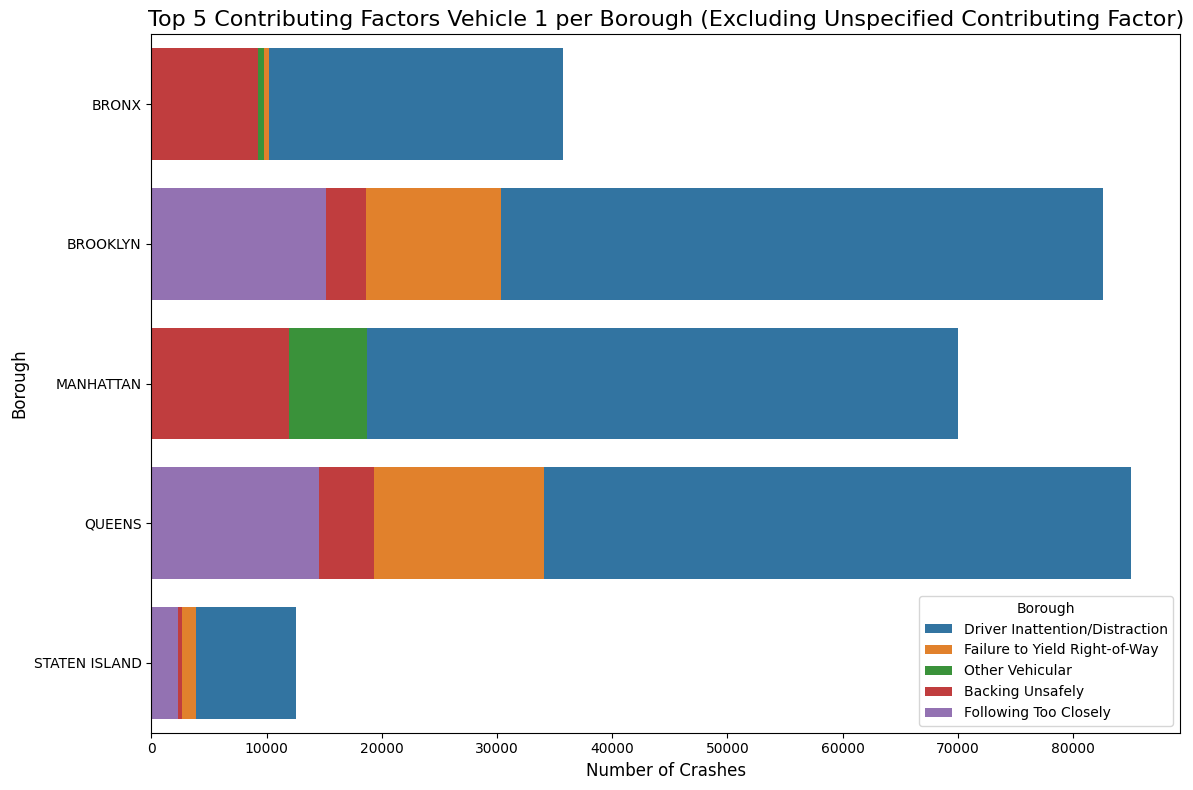

           BOROUGH   CONTRIBUTING FACTOR VEHICLE 1  Count
10           BRONX  Driver Inattention/Distraction  35707
17           BRONX   Failure to Yield Right-of-Way  10239
31           BRONX                 Other Vehicular   9772
5            BRONX                Backing Unsafely   9264
70        BROOKLYN  Driver Inattention/Distraction  82622
77        BROOKLYN   Failure to Yield Right-of-Way  30344
65        BROOKLYN                Backing Unsafely  18637
80        BROOKLYN           Following Too Closely  15176
130      MANHATTAN  Driver Inattention/Distraction  70021
151      MANHATTAN                 Other Vehicular  18743
137      MANHATTAN   Failure to Yield Right-of-Way  15549
125      MANHATTAN                Backing Unsafely  11985
190         QUEENS  Driver Inattention/Distraction  85020
197         QUEENS   Failure to Yield Right-of-Way  34099
185         QUEENS                Backing Unsafely  19314
200         QUEENS           Following Too Closely  14575
250  STATEN IS

In [ ]:
filtered_data = data[data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
factor_counts = filtered_data.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')
sorted_factors = factor_counts.sort_values(['BOROUGH', 'Count'], ascending=[True, False])
top_factors_per_borough = sorted_factors.groupby('BOROUGH').head(4)


plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_factors_per_borough,
    y='BOROUGH',
    x='Count',
    hue='CONTRIBUTING FACTOR VEHICLE 1',
    dodge=False,

)

plt.title('Top 5 Contributing Factors Vehicle 1 per Borough (Excluding Unspecified Contributing Factor)', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.legend(title='Borough', loc='lower right', fontsize=10)
plt.tight_layout()

plt.show()
print(top_factors_per_borough)

---

##<font color='crimson'>**Please read the Virtual Poster for a summary of my findings of this project**</font>

